# Math 382

## Homework 7
### Trevor Klar
### April 18th, 2017

In [1]:
def irange(start, stop, step=1):            # This is an inclusive range function, so that I don't have to remember
    if step == 1:                           # that range() leaves out the last value. 
        return range(start, stop+1)         #
    elif step < 0:                          #
        return range(start, stop-1, step)   #
    else:                                   #
        return range(start, stop+1, step)   #

def indeces(somelist):                   #returns a list of numbers from 0 to len(somelist), so I can easily iterate
    return range(len(somelist))          # with reference to the index of each element in the list

def linapprox(xlist, ylist, x):
    #estimates the value of a function using linear approximation, given a discreet mapping of x-values to y-values.
    for x_n in xlist:
        if x_n - x < 0:
            continue
        if x_n - x == 0:
            #print 'match:', x, 'is in list.'
            return ylist[xlist.index(x_n)]
        if x_n - x > 0:
            n = xlist.index(x_n)
            #print 'approximation:', x, 'is between', xlist[n-1],'and', xlist[n], '.'
            break
    try:
        x1, x2 = xlist[n-1], xlist[n]
        y1, y2 = ylist[n-1], ylist[n]
        return float((x-x1)*(y2-y1))/(x2-x1) + y1
    except:
        print 'ERROR: input', x, ' invalid. is it in the range ('+str(min(xlist))+','+str(max(xlist))+')?'

import matplotlib.pyplot as plt          # this is the
                                         # plot library
    
import numpy as np                       # not strictly necessary
                                         # but useful
    
import scipy, scipy.special, scipy.stats
    
%matplotlib inline                       
                                         # displays plots in the notebook
                                         # instead of popup windows
import math

import random

## 1) 

In [2]:
#list of row and column labels, with degrees of freedom and confidence levels, respectively.
C = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.998, 0.999, 0.9995, 0.9999]
df = irange(1,100)
width = 113

#table title
print '='*((width-7)/2)+"T-TABLE"+'='*((width-7)/2)

#1st row of column headers
print "     C "+'|',
for col in C:
    value = str(col)
    print value+" "*(6-len(value)),
print

#2nd row of column headers
print "1-tail "+'|',
for col in C:
    value = str(1-col)
    print value+" "*(6-len(value)),
print

#3rd row of column headers
print "2-tail "+'|',
for col in C:
    value = str(2*(1-col))
    print value+" "*(6-len(value)),
print

#column header separator
print "-"*width

#row containing 'df' label
print " "*(6-len(str('df')))+'df '+'|'

#the actual body of the table
for row in df:
    for col in C:
        if col == .5: #inserts the appropriate df row label before the start of the first row
            print " "*(6-len(str(row)))+str(row)+' |',
        value = str(round(-scipy.stats.t.isf(col,row),3)) #determines and formats the entry
        if len(value) > 5: value=value[:5]
        if len(value) < 5: value=value+'0'*(5-len(value))
        print value+" "*(6-len(value)), #prints the entry
    print

=====================================================T-TABLE=====================================================
     C | 0.5    0.6    0.7    0.8    0.9    0.95   0.96   0.97   0.98   0.99   0.995  0.998  0.999  0.9995 0.9999
1-tail | 0.5    0.4    0.3    0.2    0.1    0.05   0.04   0.03   0.02   0.01   0.005  0.002  0.001  0.0005 0.0001
2-tail | 1.0    0.8    0.6    0.4    0.2    0.1    0.08   0.06   0.04   0.02   0.01   0.004  0.002  0.001  0.0002
-----------------------------------------------------------------------------------------------------------------
    df |
     1 | 0.000  0.325  0.727  1.376  3.078  6.314  7.916  10.57  15.89  31.82  63.65  159.1  318.3  636.6  3183. 
     2 | 0.000  0.289  0.617  1.061  1.886  2.920  3.320  3.896  4.849  6.965  9.925  15.76  22.32  31.59  70.70 
     3 | 0.000  0.277  0.584  0.978  1.638  2.353  2.605  2.951  3.482  4.541  5.841  8.053  10.21  12.92  22.20 
     4 | 0.000  0.271  0.569  0.941  1.533  2.132  2.333  2.601  2.999  3.747  

## 2)

In [3]:
#This is my made-up probability density function, modeling the probability of one of my geometry students earning 
# a grade of 'x' on an arbitrary test. 
#
#See the figures below for an illustion of this PDF and its correspoding CDF and PPF functions, as well as a
# histogram of 10,000 random values (to show that the PDF works as intended).
#
#PDF
def testspdf(x):
    return (scipy.stats.norm(.35,.09).pdf(x)+scipy.stats.norm(.80,.06).pdf(x))/2
#CDF
def testscdf(x):
    return scipy.integrate.quad(testspdf, -float('inf'), x)[0]

In [4]:
#takes 20-30 seconds to compute on my machine.
#these are the lists of values representing the mapping for my testsppf() function. 
testsppf_y=np.linspace(0,1.0,100)
testsppf_x=[testscdf(i) for i in testsppf_y]

In [5]:
# uses my linear approximation function, at the top of this worksheet.
#PPF
def testsppf(x):
    return linapprox(testsppf_x,testsppf_y,x)

In [6]:
#takes a random sample of size 'n' from the distibution testspdf().
def sample_test_scores(n):
    a = testsppf_x[0]     #technically, testscdf() is defined for all real numbers, so testscdf(0)!=0, and
    b = testsppf_x[-1]    # testscdf(1)!=1. In order to generate random numbers that very nearly follow 
    random_test_scores=[] # the distribution and make sense, i'm only generating random numbers on the interval
    for i in range(n):    # (testscdf(0), testscdf(1)).
        random_test_scores.append(testsppf(random.uniform(a,b)))
    return random_test_scores

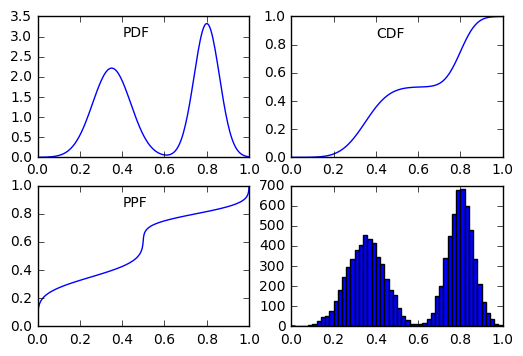

In [7]:
#Plots of the functions defined above

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
x=np.linspace(0,1,200)
ax1.plot(x,testspdf(x))
#plt.xticks(np.linspace(0,1,11))
plt.xlim(0,1)
ax1.annotate(s='PDF', xy=(0.4,3));

ax2.plot(testsppf_y,testsppf_x)
#plt.xticks(np.linspace(0,1,11))
plt.xlim(0,1)
ax2.annotate(s='CDF', xy=(0.4,.85));

ax3.plot(testsppf_x,testsppf_y)
#plt.xticks(np.linspace(0,1,11))
plt.xlim(0,1)
ax3.annotate(s='PPF', xy=(0.4,.85));

large_sample = sample_test_scores(10000)
binwidth=.02
ax4.hist(large_sample, bins=np.arange(0, 1 + binwidth, binwidth));

In [10]:
# Simulates an 'experiment' consisting of 'number_of_samples' samples of size 'sample_size'.
# Return a list of lists, containing the data from those samples. 
def experiment_test_scores(sample_size, number_of_samples=1000):
    experiment=[]
    for i in range(number_of_samples):
        experiment.append(sample_test_scores(sample_size))
    return experiment

# Calculates the standard error of the mean of the above set of samples. 
def experimental_standard_error(n):
    means = np.mean(experiment_test_scores(n), axis=1)
    return np.std(means)

# the list of sample sizes that we will plot against their standard errors. 
samplesize_x=irange(5,25,5)+[50,100]
# a list of standard errors which correspond to the sample sizes above.
samplesize_y=[experimental_standard_error(n) for n in samplesize_x]

#to plot the smooth curve, i needed the population standard deviation, so i calculate it here:
#mean
def function(x): return x*testspdf(x)
mean=scipy.integrate.quad(function,0,1)[0]
print 'mean=\t\t',mean
#variance
def function(x): return (x-mean)**2*testspdf(x)
variance=scipy.integrate.quad(function,0,1)[0]
print 'variance=\t',variance
#standard deviation
pdf_std=np.sqrt(variance)
print 'stdev=\t\t',pdf_std

mean=		0.574782630693
variance=	0.0564243590063
stdev=		0.237538121164


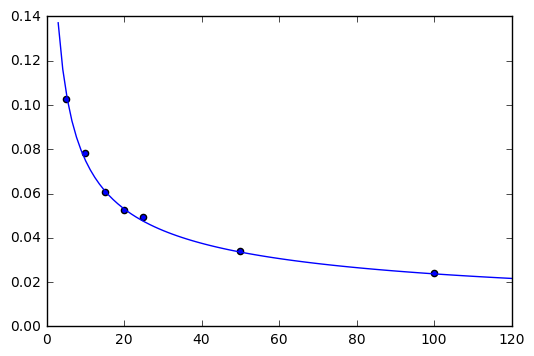

In [9]:
#pdf_std = np.std([testspdf(i) for i in np.linspace(0,1.0,100)])
#plots everything on the same figure.

#smooth curve
x=np.linspace(3,120,100)
y=[pdf_std/np.sqrt(i) for i in x]
plt.plot(x,y)
#dots from experimental standard errors
plt.scatter(samplesize_x,samplesize_y)
plt.xlim(0,120);
plt.ylim(0,.14);